In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [58]:
df = pd.read_csv('Food_Inspections_Clean.csv')
df.head()

,Inspection ID,DBA Name,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,month,day,year
0,1970470,IYANZE,Restaurant,1.0,4623-4627 N BROADWAY,60640.0,10/28/2016,Short Form Complaint,1.0,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.966063,-87.657734,10,28,2016
1,1970465,KENYATTA'S DAYCARE,Daycare Above and Under 2 Years,1.0,2334 E 75TH ST,60649.0,10/28/2016,License,0.0,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.759085,-87.567448,10,28,2016
2,1970461,DOMINOS,Restaurant,2.0,1234 S CANAL ST,60607.0,10/28/2016,Complaint Re-Inspection,0.0,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.866277,-87.639360,10,28,2016
3,1970431,ST JUDE EDUCATONAL INSTITUTE,Daycare (2 - 6 Years),1.0,2219 E 79TH ST,60649.0,10/28/2016,License,0.0,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.751569,-87.570283,10,28,2016
4,1970429,"FIRST SLICE, LLC",Restaurant,1.0,4401 N RAVENSWOOD AVE,60640.0,10/28/2016,Complaint,2.0,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.961619,-87.673833,10,28,2016


In [3]:
#describe the data
df.isnull().sum()

Inspection ID          0
DBA Name               0
Facility Type       4452
Risk                  76
Address                0
Zip                  105
Inspection Date        0
Inspection Type        1
Results            16282
Violations         27249
Latitude             479
Longitude            479
month                  0
day                    0
year                   0
dtype: int64

In [4]:
df.describe()

C:\Users\CORSAIR\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Inspection ID,Risk,Zip,Results,Latitude,Longitude,month,day,year
count,1.343840e+05,134308.000000,134279.000000,118102.000000,133905.000000,133905.000000,134384.000000,134384.000000,134384.000000
mean,1.129558e+06,1.409752,60629.055459,0.549279,41.879135,-87.675872,6.451259,15.739247,2012.990229
std,5.117647e+05,0.666438,39.520424,0.831157,0.081358,0.058491,3.319782,8.571820,1.927621
min,4.424700e+04,1.000000,60007.000000,0.000000,41.644670,-87.914428,1.000000,1.000000,2010.000000
25%,5.983028e+05,NaN,NaN,NaN,NaN,NaN,4.000000,8.000000,2011.000000
50%,1.307660e+06,NaN,NaN,NaN,NaN,NaN,6.000000,16.000000,2013.000000
75%,1.497662e+06,NaN,NaN,NaN,NaN,NaN,9.000000,23.000000,2015.000000
max,1.973212e+06,3.000000,66019.000000,2.000000,42.021064,-87.525094,12.000000,31.000000,2016.000000


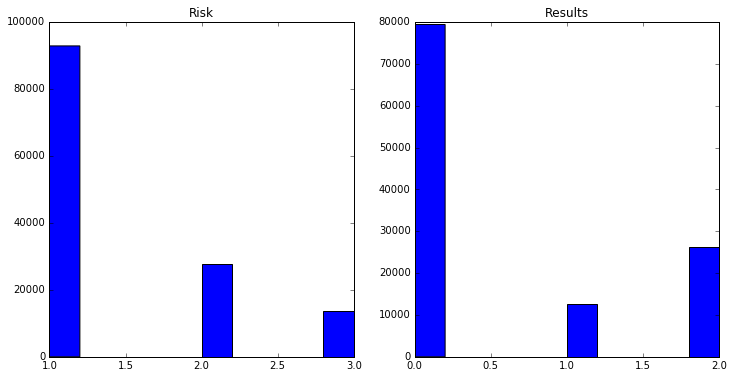

In [11]:
#histogram it up!

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.hist(df['Risk'][df['Risk'].notnull()])
ax.set_title('Risk')
ay = fig.add_subplot(122)
ay.hist(df['Results'][df['Results'].notnull()])
ay.set_title('Results')

plt.show()

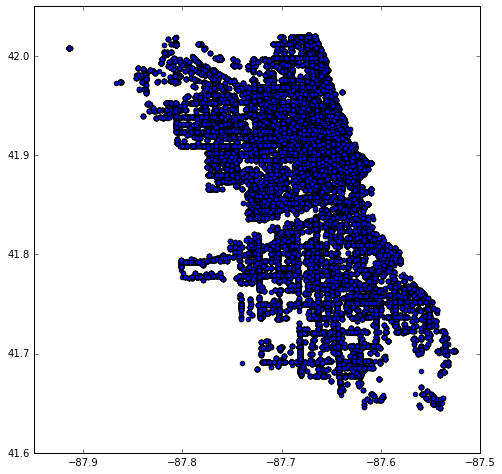

In [16]:
#explore lat long
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df['Longitude'],df['Latitude'])
plt.show()

Looks like Chicago to me! Those far western points might be spurious entries, but O'hare Airport is considered inside the city and it bumps out west like that. Those might be the food options in the airport.

- Visualize changes in inspection outcome during different days of the week, month of the year; observe common patterns (if any).
- Visualize changes in inspection outcome for differing facility types, neighborhood, and risk levels.
- Remove records with spurious entries (e.g. with invalid geographic coordinates, inspection outcomes that are neither pass, pass with conditions, nor fail)

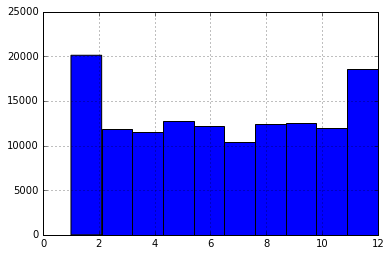

In [29]:
df['month'].hist()

Large amount of inspections done in December and January, other months relatively similar.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004D190390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000004E5D4518>]], dtype=object)

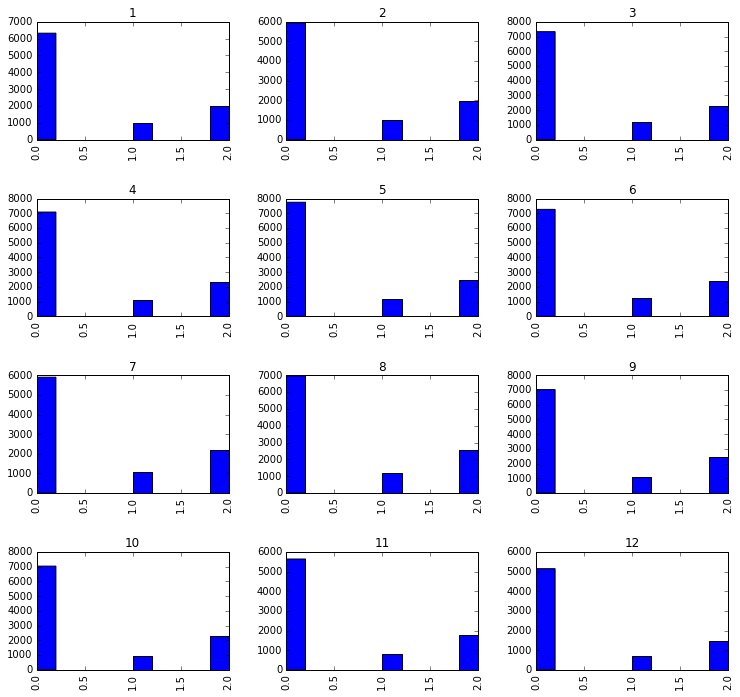

In [34]:
#inspection outcome by month
df['Results'].hist(by=df['month'], figsize=(12,12))

All months have nearly identical pass/fail rates.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003C8DBEF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000040FAC6A0>]], dtype=object)

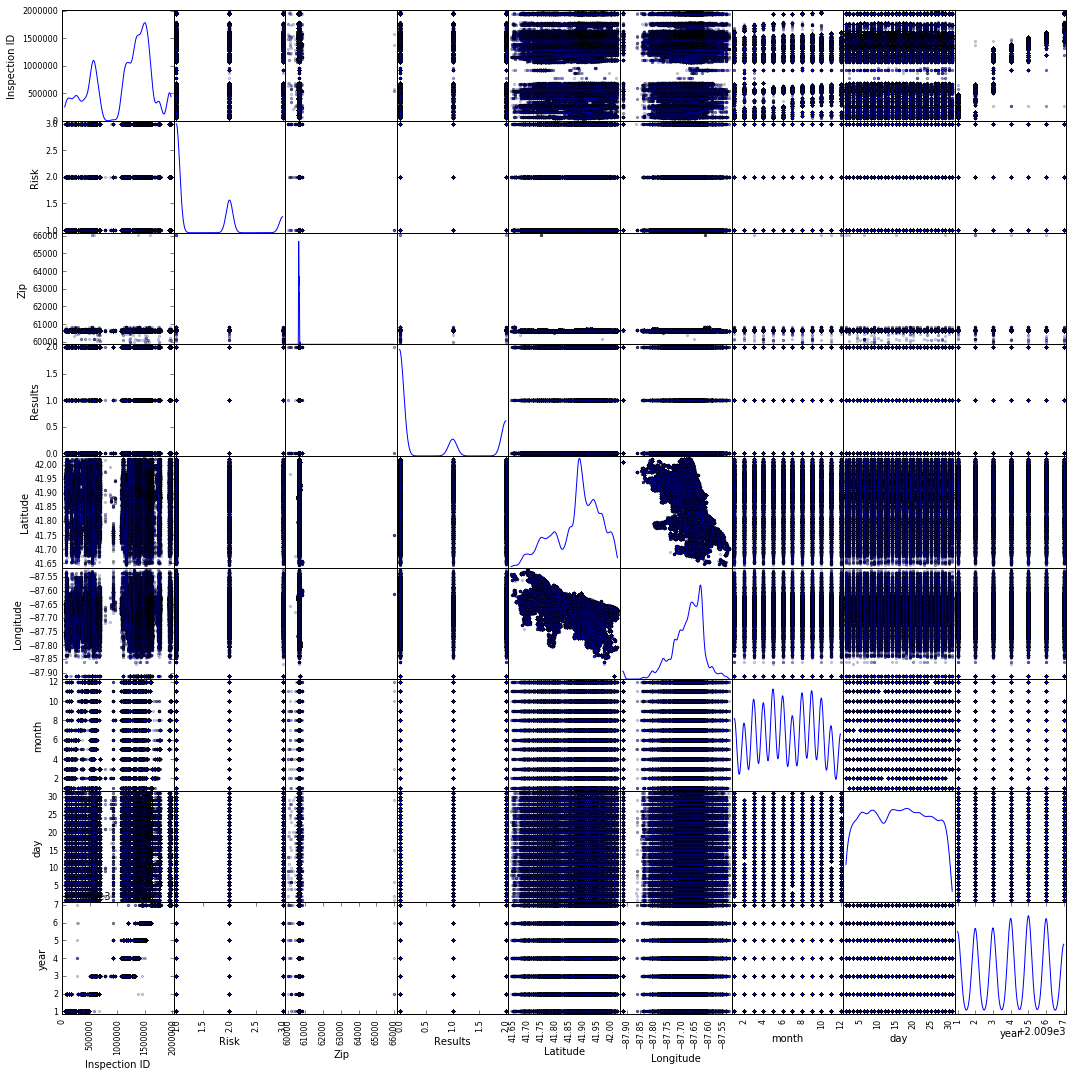

In [33]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(18, 18), diagonal='kde')

Results
0.0    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
1.0    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
2.0    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

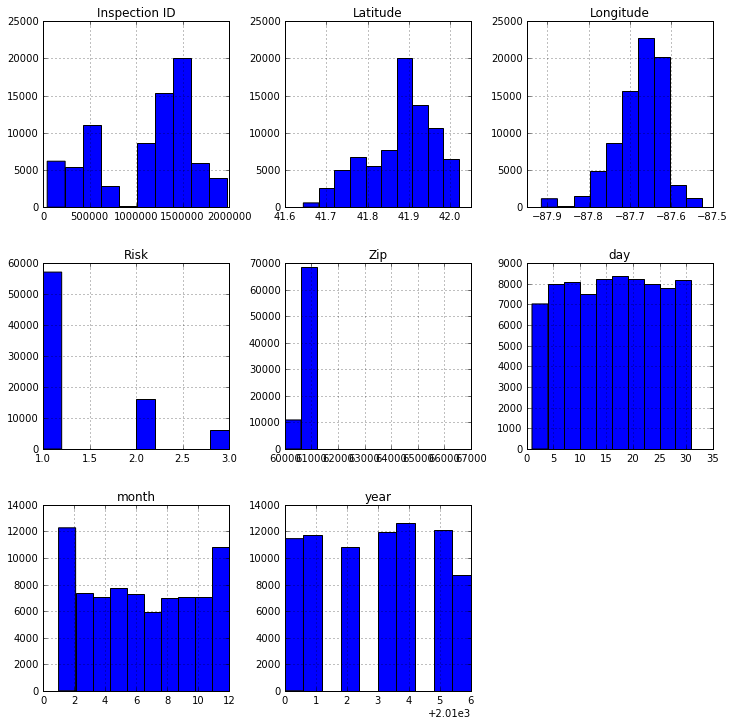

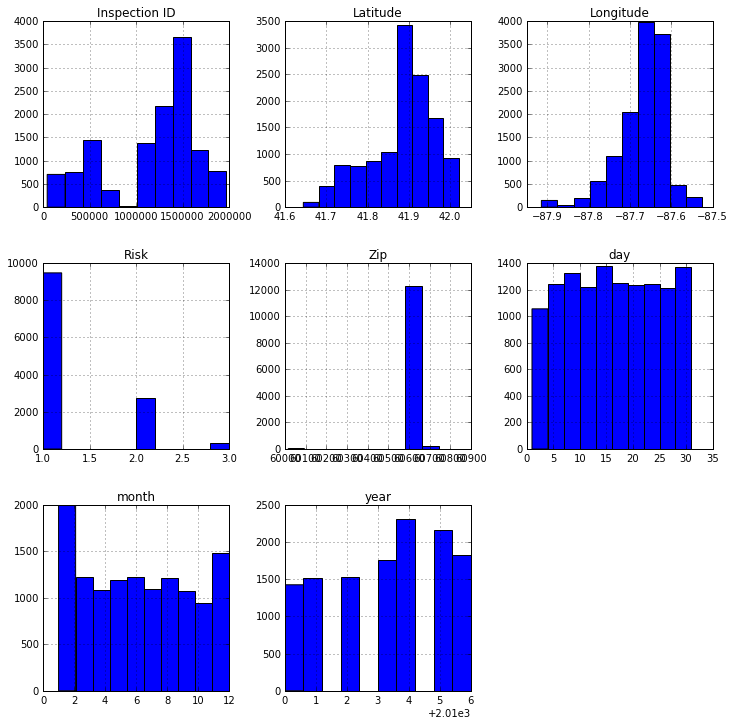

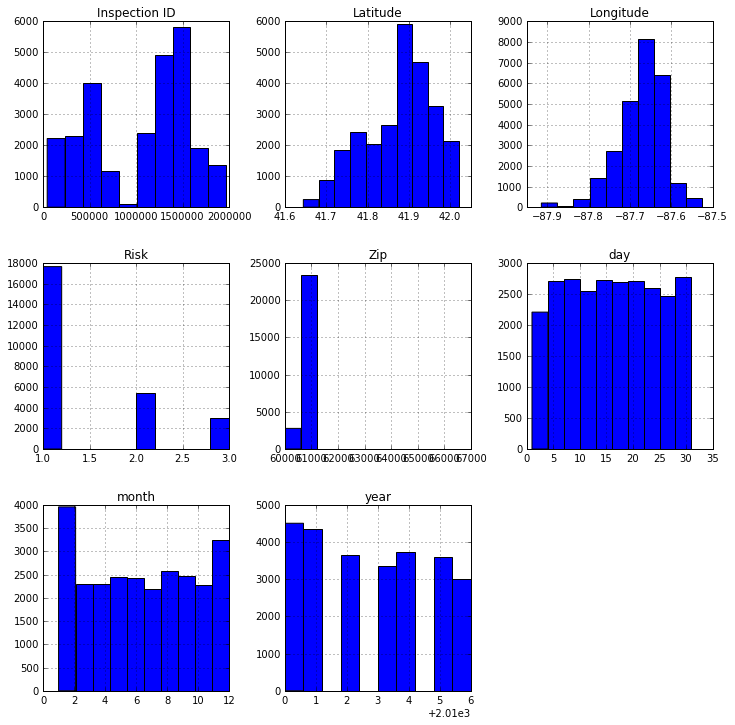

In [35]:
df.groupby('Results').hist(figsize=(12,12))

Vast majority of pass and fail came from one massive zip code. Almost all "pass with conditions" came from one different region of zip codes, somehting weird there...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000661DAE10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000642BA4A8>]], dtype=object)

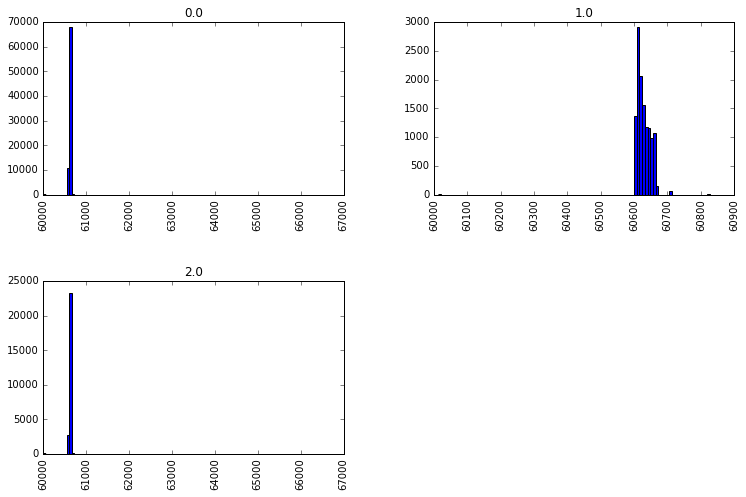

In [105]:
df['Zip'].hist(by=df['Results'], figsize=(12,8), bins = len(df.Zip.unique()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000060BC9DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000062012898>]], dtype=object)

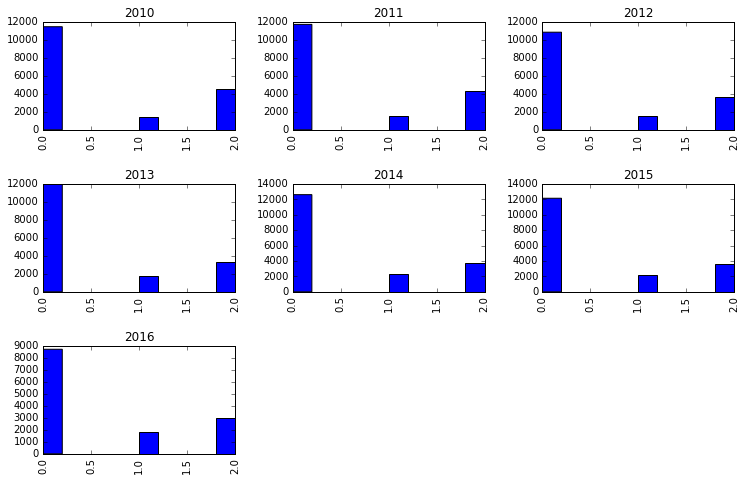

In [46]:
#inspection outcome by year
df['Results'].hist(by=df['year'], figsize=(12,8))

Year-to-year trends don't look valuable to explore.

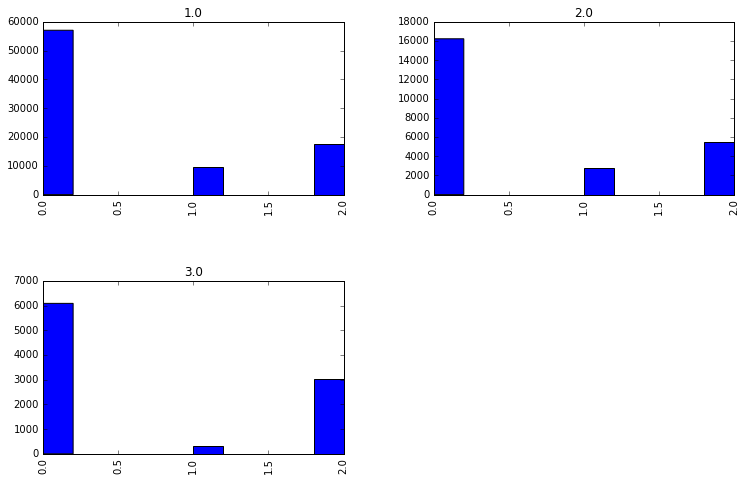

In [50]:
#inspection results by risk
plt.figure(); df['Results'].hist(by=df['Risk'], figsize=(12,8));

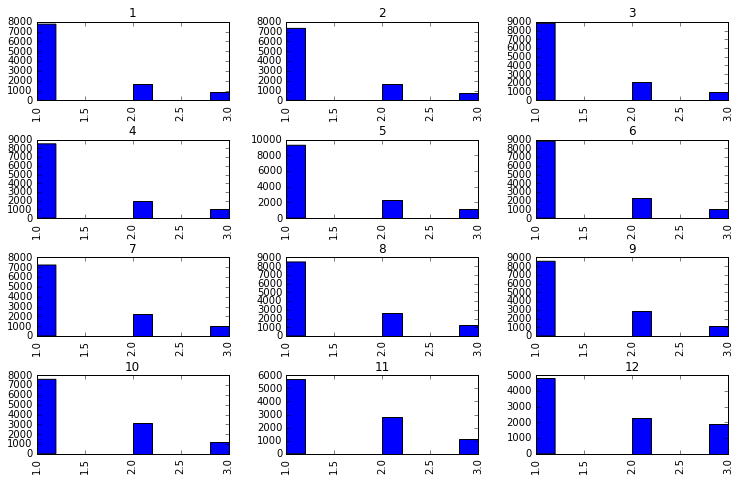

In [59]:
#risk by month
plt.figure(); df['Risk'].hist(by=df['month'], figsize=(12,8));

Remember here that Risk=1 is HIGH risk. 

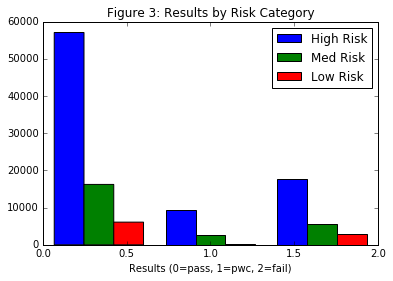

In [82]:
results_risk1 = df['Results'][df['Risk'] == 1]
results_risk2 = df['Results'][df['Risk'] == 2]
results_risk3 = df['Results'][df['Risk'] == 3]

common_params = dict(bins=3, 
                     range=(0, 2), 
                     normed=False)

plt.subplots_adjust(hspace=.4)
plt.subplot(111)
plt.title('Figure 3: Results by Risk Category')
plt.xlabel('Results (0=pass, 1=pwc, 2=fail)')
plt.hist((results_risk1, results_risk2, results_risk3), **common_params)
plt.legend(['High Risk','Med Risk','Low Risk'], loc=1)

plt.show()

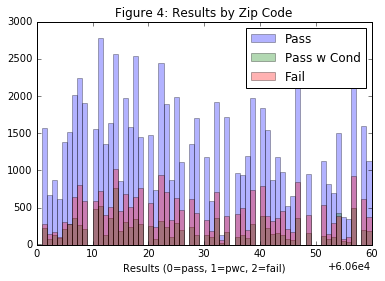

In [117]:
zip_pass = df['Zip'][df['Results'] == 0]
zip_pwc = df['Zip'][df['Results'] == 1]
zip_fail = df['Zip'][df['Results'] == 2]

common_params = dict(range=(60600, 60660), bins = 66, normed=False, alpha=0.3)

plt.subplot(111)
plt.title('Figure 4: Results by Zip Code')
plt.xlabel('Results (0=pass, 1=pwc, 2=fail)')
plt.hist(zip_pass, **common_params)
plt.hist(zip_pwc, **common_params)
plt.hist(zip_fail, **common_params)
plt.legend(['Pass','Pass w Cond','Fail'], loc=1)

plt.show()

In [124]:
df.rename(columns={'Facility Type':'FacilityType'},inplace=True)
len(df.FacilityType.unique())

433

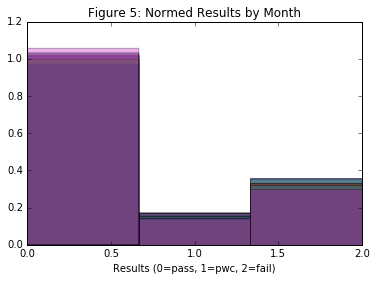

In [123]:
results_m1 = df['Results'][df['month'] == 1]
results_m2 = df['Results'][df['month'] == 2]
results_m3 = df['Results'][df['month'] == 3]
results_m4 = df['Results'][df['month'] == 4]
results_m5 = df['Results'][df['month'] == 5]
results_m6 = df['Results'][df['month'] == 6]
results_m7 = df['Results'][df['month'] == 7]
results_m8 = df['Results'][df['month'] == 8]
results_m9 = df['Results'][df['month'] == 9]
results_m10 = df['Results'][df['month'] == 10]
results_m11 = df['Results'][df['month'] == 11]
results_m12 = df['Results'][df['month'] == 12]

common_params = dict(bins=3, range=(0, 2), normed=True, alpha=0.3)

plt.subplots_adjust(hspace=.4)
plt.subplot(111)
plt.title('Figure 5: Normed Results by Month')
plt.xlabel('Results (0=pass, 1=pwc, 2=fail)')
plt.hist(results_m1, **common_params)
plt.hist(results_m2, **common_params)
plt.hist(results_m3, **common_params)
plt.hist(results_m4, **common_params)
plt.hist(results_m5, **common_params)
plt.hist(results_m6, **common_params)
plt.hist(results_m7, **common_params)
plt.hist(results_m8, **common_params)
plt.hist(results_m9, **common_params)
plt.hist(results_m10, **common_params)
plt.hist(results_m11, **common_params)
plt.hist(results_m12, **common_params)

plt.show()

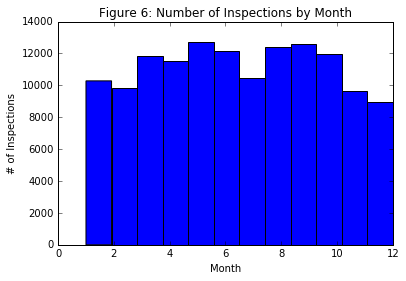

In [131]:
common_params = dict(bins=12, range=(1, 12), normed=False)

plt.subplots_adjust(hspace=.4)
plt.subplot(111)
plt.title('Figure 6: Number of Inspections by Month')
plt.xlabel('Month')
plt.ylabel('# of Inspections')
plt.hist(df['month'], **common_params)

plt.show()